In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetic_data.csv')

In [57]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_binary,primary_diag_group
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,NO,0,Diabetes
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,No,No,No,No,Ch,Yes,>30,0,Other
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,Yes,NO,0,Other
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,No,No,No,No,Ch,Yes,NO,0,Other
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,No,No,No,No,Ch,Yes,NO,0,Neoplasms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,No,No,No,No,Ch,Yes,>30,0,Diabetes
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,No,No,No,No,No,Yes,NO,0,Digestive
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,No,No,No,No,Ch,Yes,NO,0,Other
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,No,No,No,No,Ch,Yes,NO,0,Injury


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
df.isnull().sum()


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [10]:
df.shape

(101766, 50)

In [11]:
df.replace('?',np.nan,inplace=True)

In [12]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [17]:
df['readmitted'].value_counts(normalize=True)

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='readmitted'>

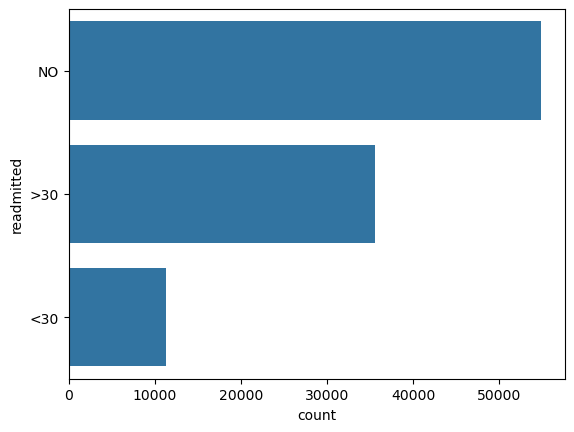

In [19]:
sns.countplot(df['readmitted'])

In [20]:
df['readmit_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

<Axes: xlabel='count', ylabel='age'>

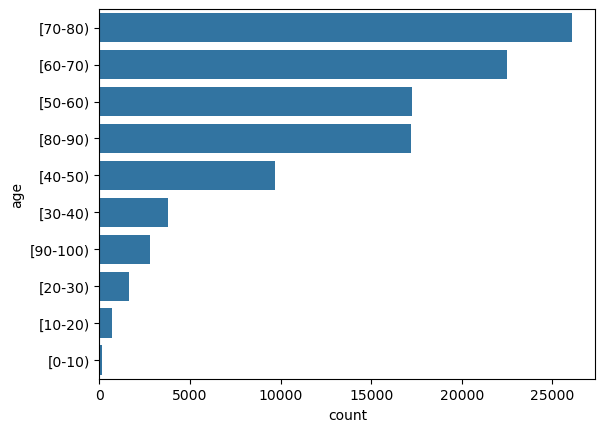

In [21]:
sns.countplot(y='age', data=df, order=df['age'].value_counts().index)

<Axes: xlabel='gender', ylabel='count'>

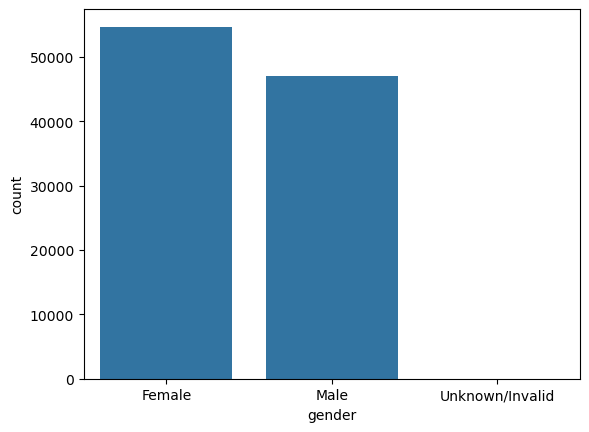

In [23]:
sns.countplot(x='gender', data=df)


<Axes: xlabel='race', ylabel='count'>

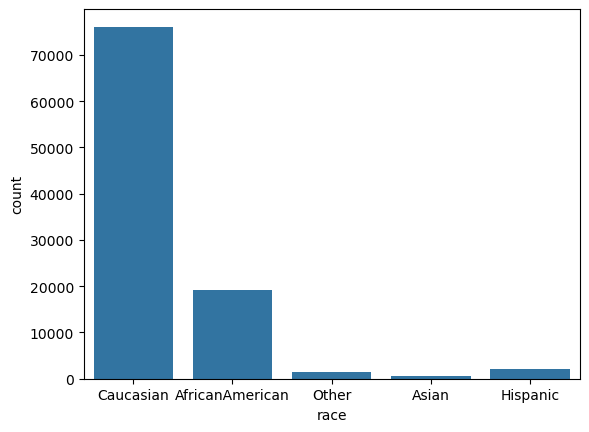

In [24]:
sns.countplot(x='race', data=df)

<Axes: xlabel='gender', ylabel='readmit_binary'>

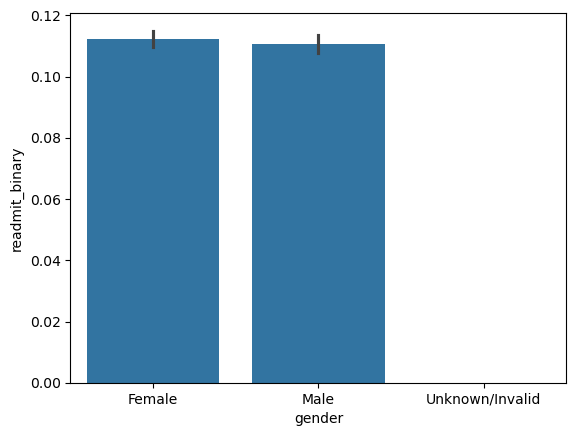

In [26]:
sns.barplot(data=df, x='gender', y='readmit_binary')


<Axes: xlabel='race', ylabel='readmit_binary'>

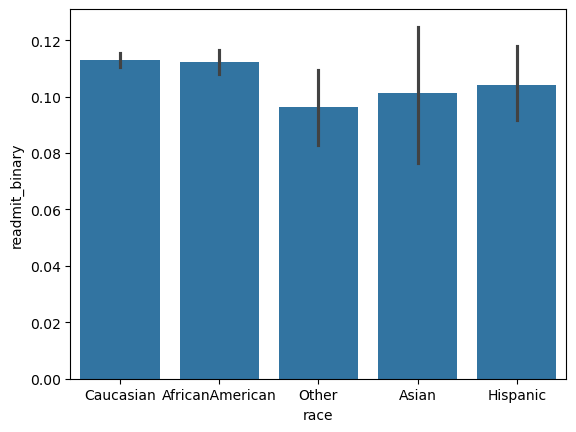

In [27]:
sns.barplot(data=df, x='race', y='readmit_binary')

In [29]:
df['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101761    250.13
101762       560
101763        38
101764       996
101765       530
Name: diag_1, Length: 101766, dtype: object

In [30]:
def categorize_diag(diag):
    try:
        d = float(diag)
        if d >= 390 and d <= 459 or d == 785:
            return 'Circulatory'
        elif d >= 460 and d <= 519 or d == 786:
            return 'Respiratory'
        elif d >= 520 and d <= 579 or d == 787:
            return 'Digestive'
        elif d >= 250 and d < 251:
            return 'Diabetes'
        elif d >= 800 and d <= 999:
            return 'Injury'
        elif d >= 710 and d <= 739:
            return 'Musculoskeletal'
        elif d >= 580 and d <= 629 or d == 788:
            return 'Genitourinary'
        elif d >= 140 and d <= 239:
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        return 'Unknown'

df['primary_diag_group'] = df['diag_1'].apply(categorize_diag)

<Axes: xlabel='count', ylabel='primary_diag_group'>

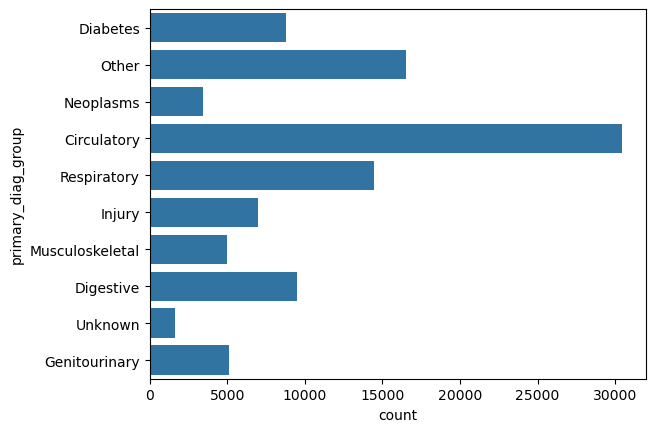

In [31]:
sns.countplot(y='primary_diag_group', data=df)

<Axes: xlabel='readmit_binary', ylabel='primary_diag_group'>

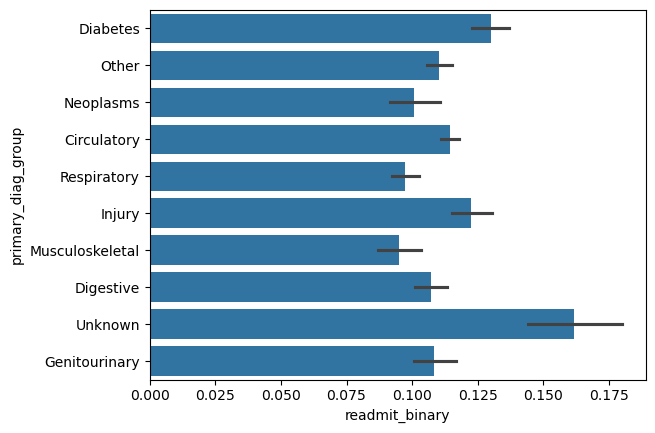

In [32]:
sns.barplot(data=df, y='primary_diag_group', x='readmit_binary')

In [33]:
med_cols = df.columns[df.columns.str.startswith('med') | df.columns.str.contains('insulin')]
df[med_cols].apply(pd.Series.value_counts)

,medical_specialty,insulin
AllergyandImmunology,7.0,NaN
Anesthesiology,12.0,NaN
Anesthesiology-Pediatric,19.0,NaN
Cardiology,5352.0,NaN
Cardiology-Pediatric,7.0,NaN
...,...,...
Surgery-Thoracic,109.0,NaN
Surgery-Vascular,533.0,NaN
SurgicalSpecialty,33.0,NaN
Up,NaN,11316.0


<Axes: xlabel='insulin', ylabel='count'>

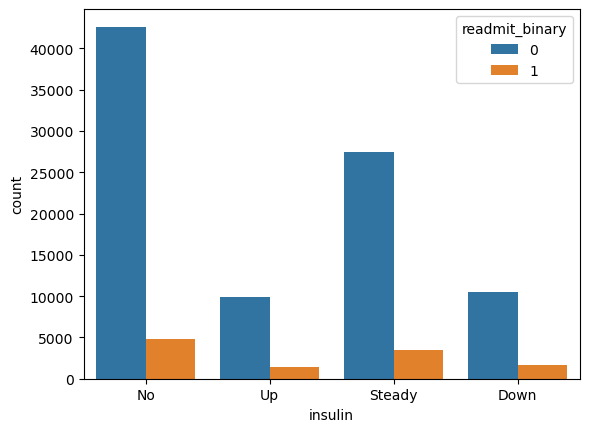

In [34]:
sns.countplot(data=df, x='insulin', hue='readmit_binary')

<Axes: xlabel='time_in_hospital', ylabel='Count'>

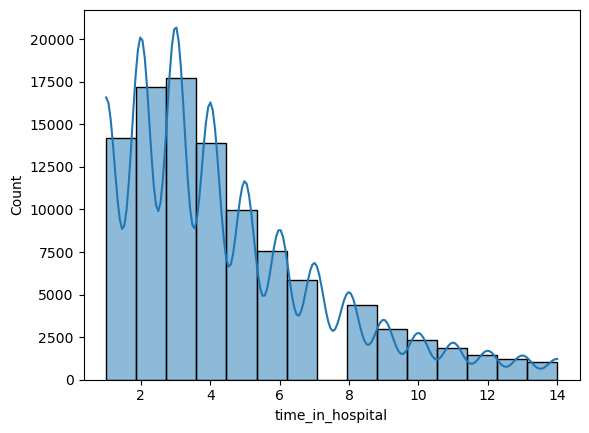

In [37]:
sns.histplot(df['time_in_hospital'], kde=True, bins=15)


<Axes: xlabel='readmit_binary', ylabel='time_in_hospital'>

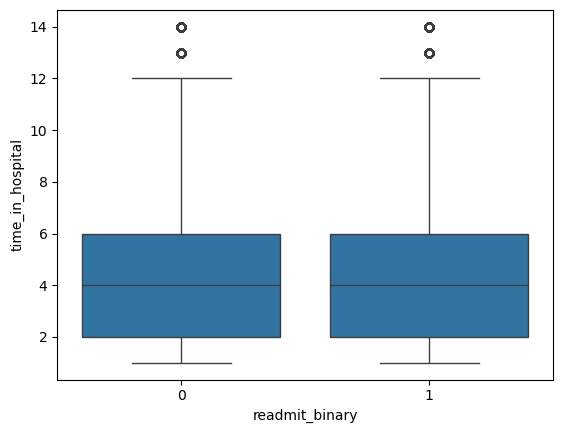

In [38]:
sns.boxplot(x='readmit_binary', y='time_in_hospital', data=df)

<Axes: xlabel='readmit_binary', ylabel='num_procedures'>

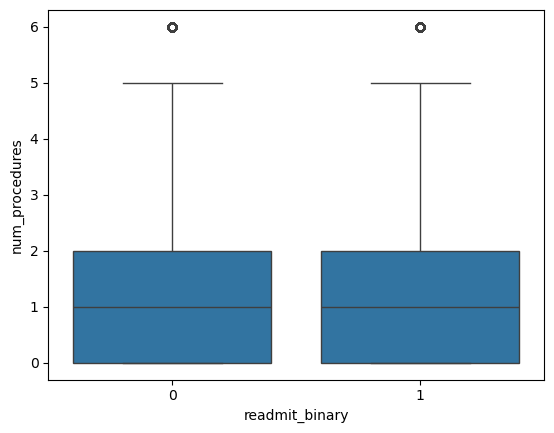

In [39]:
sns.boxplot(data=df, x='readmit_binary', y='num_procedures')


<Axes: xlabel='readmit_binary', ylabel='num_lab_procedures'>

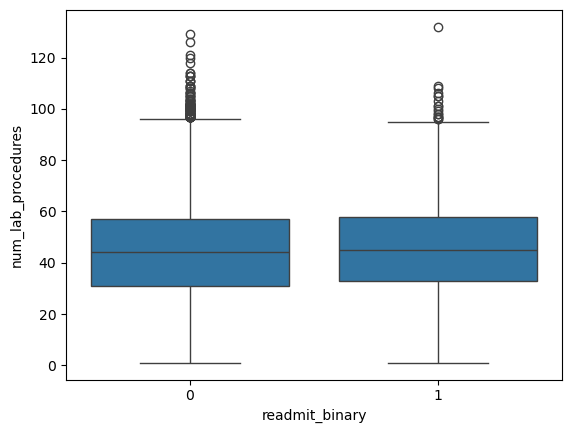

In [40]:
sns.boxplot(data=df, x='readmit_binary', y='num_lab_procedures')

<Axes: xlabel='count', ylabel='admission_type_id'>

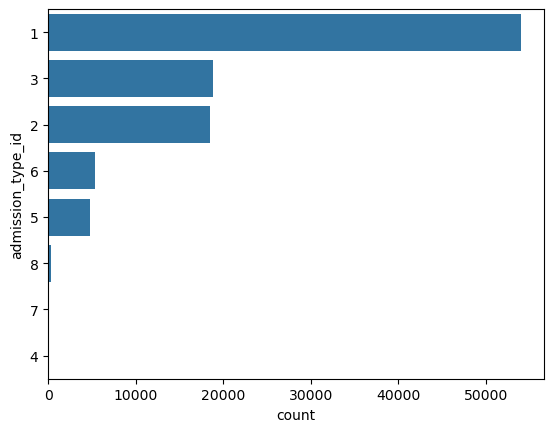

In [41]:
sns.countplot(data=df, y='admission_type_id', order=df['admission_type_id'].value_counts().index)

<Axes: xlabel='count', ylabel='discharge_disposition_id'>

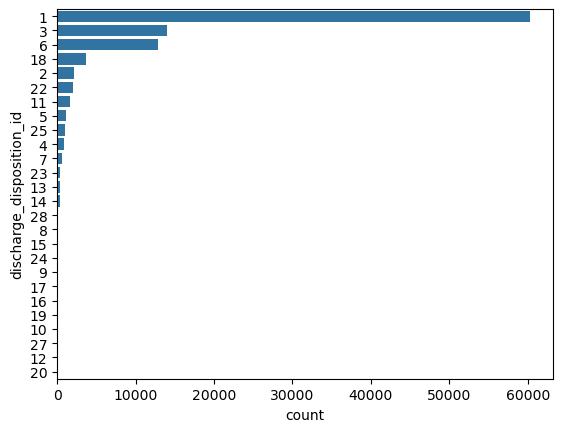

In [42]:
sns.countplot(data=df, y='discharge_disposition_id', order=df['discharge_disposition_id'].value_counts().index)

<Axes: xlabel='number_inpatient', ylabel='Count'>

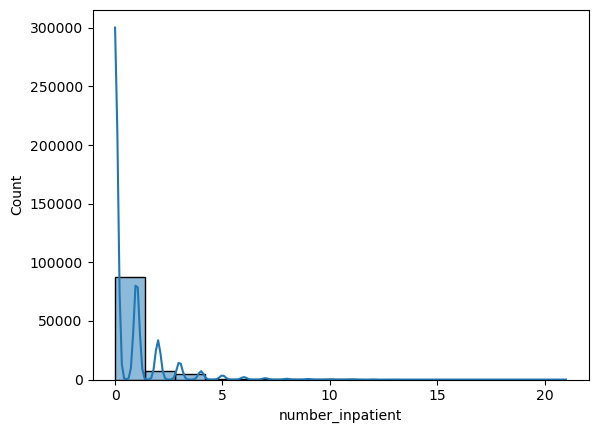

In [43]:
sns.histplot(df['number_inpatient'], bins=15, kde=True)

<Axes: xlabel='readmit_binary', ylabel='number_inpatient'>

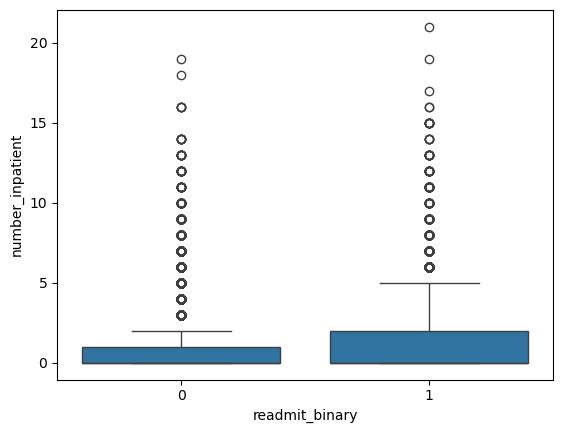

In [44]:
sns.boxplot(data=df, x='readmit_binary', y='number_inpatient')

<Axes: >

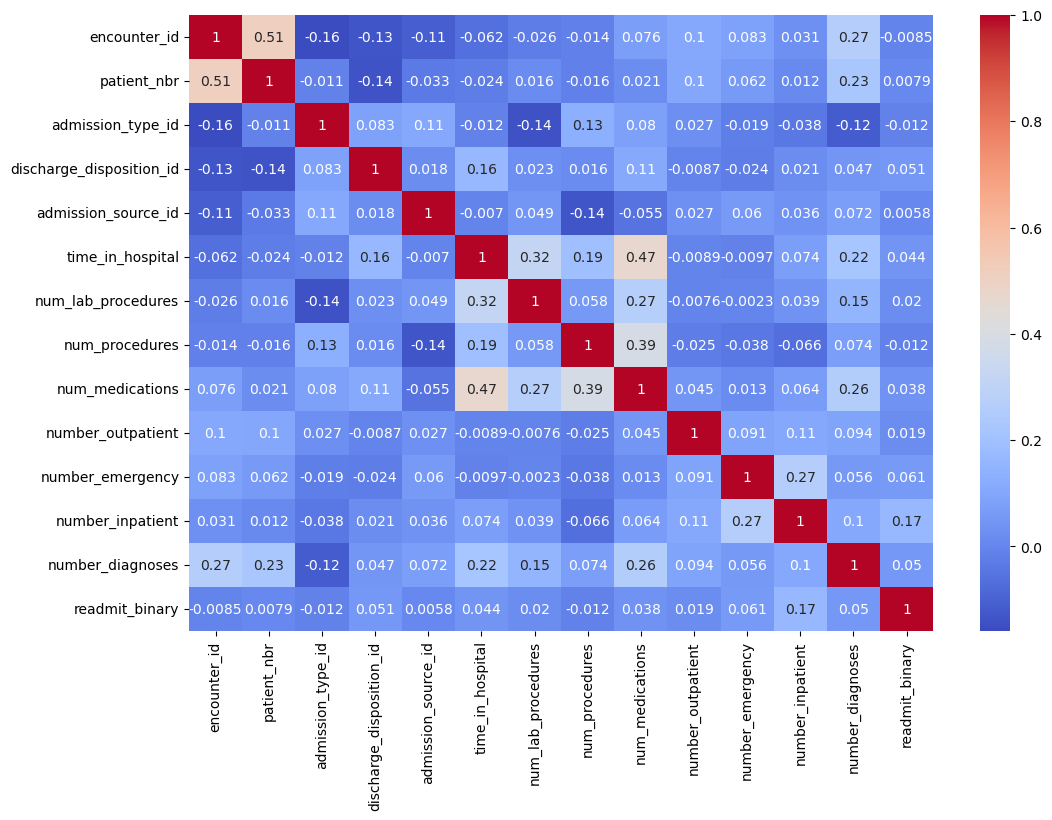

In [54]:
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')